<a href="https://colab.research.google.com/github/kserdem/SMOTE-Algorithms-for-Imblance-Data/blob/main/SMOTE_Algorithms_for_Imblance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: import pandas as pd

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
data= pd.read_csv("/content/drive/MyDrive/İmblance DataSet/dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# EKSİK GÖZLEM ANALİZİ

In [4]:
def null_pergentage(data):
  for i in data.columns:
    null= data[i].isnull().sum()/data.shape[0]*100
    print(i,'Değişkeninin %',null,'eksik gözlemden oluşmaktadır.')

In [5]:
null_pergentage(data)

id Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.
gender Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.
age Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.
hypertension Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.
heart_disease Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.
ever_married Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.
work_type Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.
Residence_type Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.
avg_glucose_level Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.
bmi Değişkeninin % 3.3686635944700463 eksik gözlemden oluşmaktadır.
smoking_status Değişkeninin % 30.62672811059908 eksik gözlemden oluşmaktadır.
stroke Değişkeninin % 0.0 eksik gözlemden oluşmaktadır.


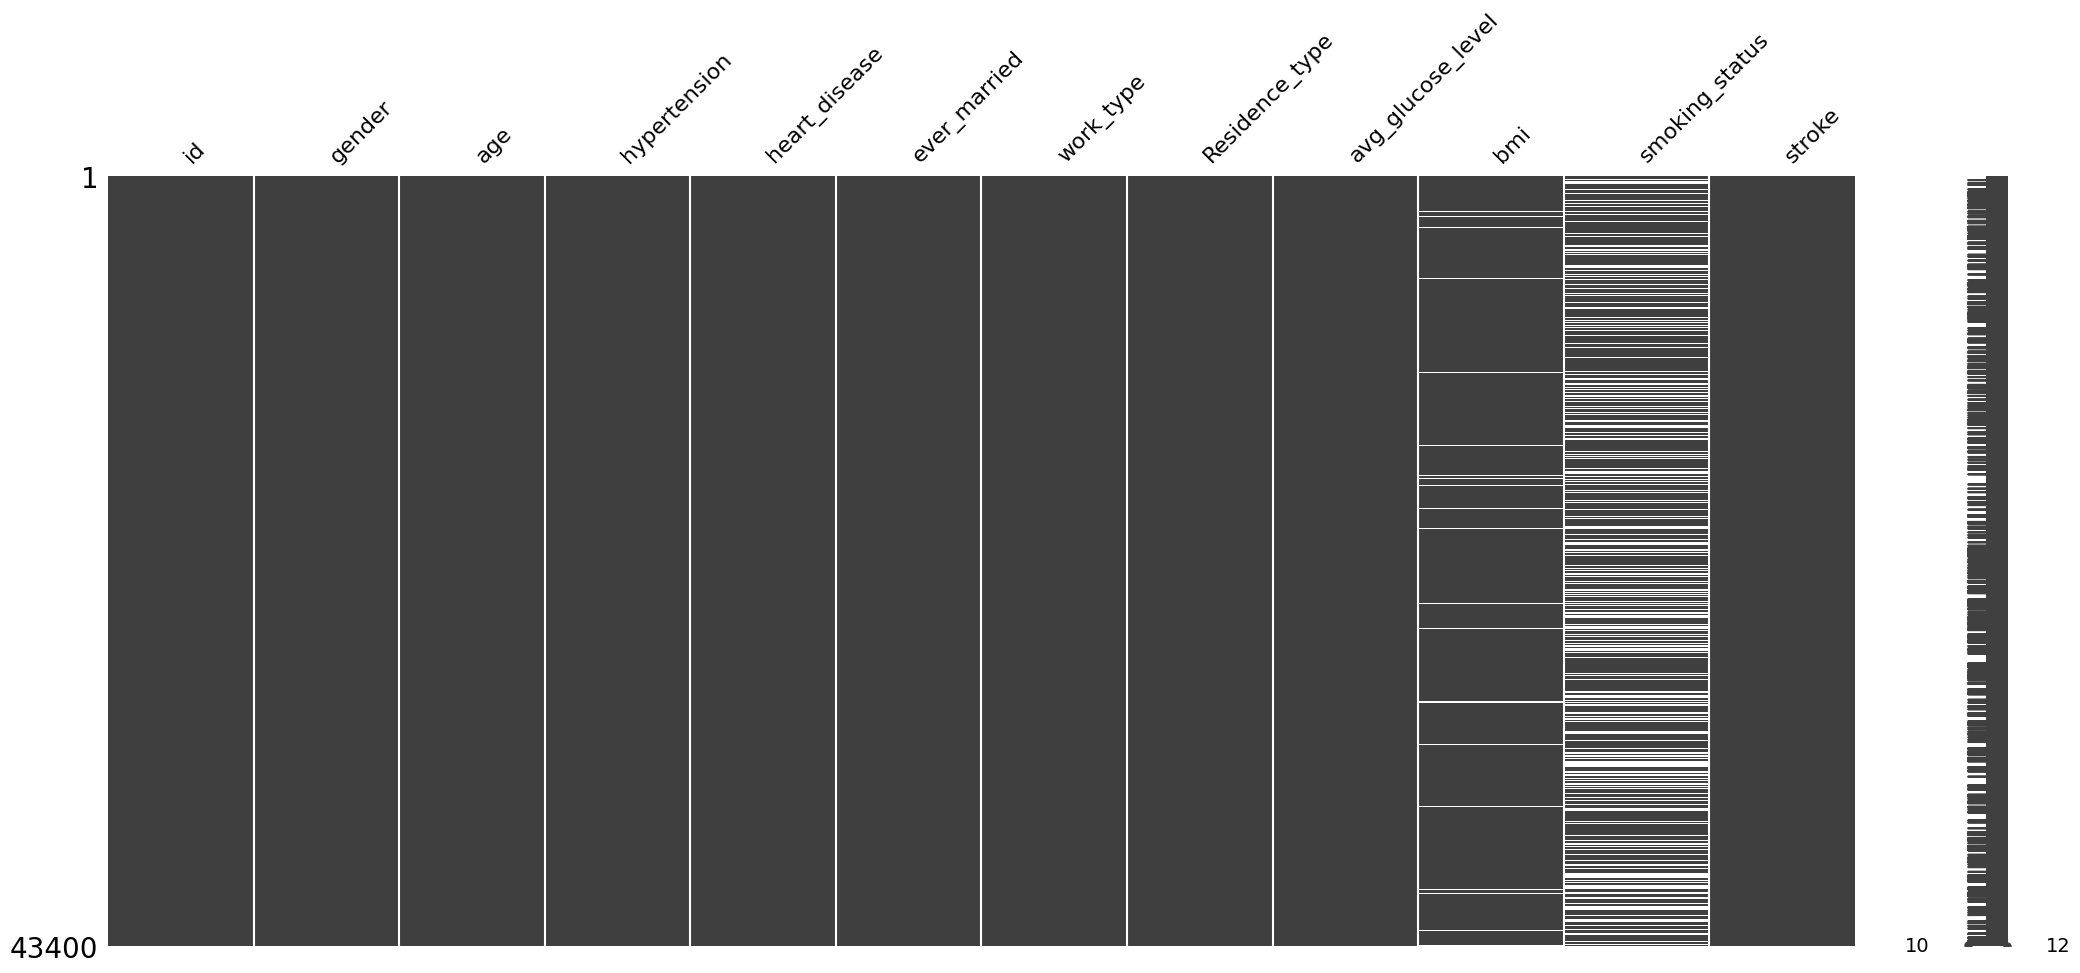

In [6]:
msno.matrix(data)
plt.show()

In [7]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29072 entries, 1 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29072 non-null  int64  
 1   gender             29072 non-null  object 
 2   age                29072 non-null  float64
 3   hypertension       29072 non-null  int64  
 4   heart_disease      29072 non-null  int64  
 5   ever_married       29072 non-null  object 
 6   work_type          29072 non-null  object 
 7   Residence_type     29072 non-null  object 
 8   avg_glucose_level  29072 non-null  float64
 9   bmi                29072 non-null  float64
 10  smoking_status     29072 non-null  object 
 11  stroke             29072 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.9+ MB


In [8]:
data['stroke'].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

# Kategorik Değişken Dönüşümü

In [9]:
data['gender'].value_counts()

Female    17852
Male      11213
Other         7
Name: gender, dtype: int64

In [10]:
data[data['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2914,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
19748,13471,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.0,formerly smoked,0
21041,31015,Other,19.0,0,0,No,Private,Rural,75.76,32.2,formerly smoked,0
21192,27043,Other,49.0,0,0,Yes,Private,Urban,94.88,37.2,never smoked,0
24252,51111,Other,51.0,0,0,Yes,Private,Rural,91.75,32.2,formerly smoked,0
26199,42452,Other,10.0,0,0,No,children,Rural,72.05,21.2,formerly smoked,0
40768,14986,Other,11.0,0,0,No,children,Urban,101.30,18.1,formerly smoked,0


In [11]:
data=data.drop(index=[2914,19748,21041,21192,24252,26199,40768])
data['gender'].value_counts()

Female    17852
Male      11213
Name: gender, dtype: int64

In [12]:
data['gender']=data['gender'].replace(['Female','Male'],[1,0])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,0,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
3,56543,1,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,1,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,1,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,1,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [13]:
data['ever_married'].value_counts()

Yes    21687
No      7378
Name: ever_married, dtype: int64

In [14]:
data['ever_married']=data['ever_married'].replace(['Yes','No'],[1,0])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,0,58.0,1,0,1,Private,Urban,87.96,39.2,never smoked,0
3,56543,1,70.0,0,0,1,Private,Rural,69.04,35.9,formerly smoked,0
6,52800,1,52.0,0,0,1,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,1,75.0,0,1,1,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,1,32.0,0,0,1,Private,Rural,77.67,32.3,smokes,0


In [15]:
data['Residence_type'].value_counts()

Urban    14592
Rural    14473
Name: Residence_type, dtype: int64

In [16]:
data['Residence_type']= data['Residence_type'].replace(['Urban','Rural'],[0,1])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,0,58.0,1,0,1,Private,0,87.96,39.2,never smoked,0
3,56543,1,70.0,0,0,1,Private,1,69.04,35.9,formerly smoked,0
6,52800,1,52.0,0,0,1,Private,0,77.59,17.7,formerly smoked,0
7,41413,1,75.0,0,1,1,Self-employed,1,243.53,27.0,never smoked,0
8,15266,1,32.0,0,0,1,Private,1,77.67,32.3,smokes,0


In [17]:
data['smoking_status'].value_counts()

never smoked       15746
formerly smoked     7093
smokes              6226
Name: smoking_status, dtype: int64

In [18]:
data['work_type'].value_counts()

Private          18950
Self-employed     5204
Govt_job          4195
children           615
Never_worked       101
Name: work_type, dtype: int64

In [19]:
data=pd.get_dummies(data,columns=["smoking_status","work_type"])
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1,30468,0,58.0,1,0,1,0,87.96,39.2,0,0,1,0,0,0,1,0,0
3,56543,1,70.0,0,0,1,1,69.04,35.9,0,1,0,0,0,0,1,0,0
6,52800,1,52.0,0,0,1,0,77.59,17.7,0,1,0,0,0,0,1,0,0
7,41413,1,75.0,0,1,1,1,243.53,27.0,0,0,1,0,0,0,0,1,0
8,15266,1,32.0,0,0,1,1,77.67,32.3,0,0,0,1,0,0,1,0,0


In [20]:
data['stroke'].value_counts()

0    28517
1      548
Name: stroke, dtype: int64

# SMOTE Uygulanmadan Önce Modellerin Performansı

In [21]:
class Model:
  def __init__(self,data):
     self.data=data



  def GBM(x,y):
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import classification_report
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=42)
    print("---------------------------------------------------------------------------")
    print("X_train", X_train.shape)
    print("y_train",y_train.shape)
    print("X_test",X_test.shape)
    print("y_test",y_test.shape)
    gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
    y_pred_gbm = gbm_model.predict(X_test)
    print("---------------------------------------------------------------------------")
    print("Gradient Boosting Model Çıktıları")
    print("---------------------------------------------------------------------------")
    print(classification_report(y_test,y_pred_gbm ))
    print("---------------------------------------------------------------------------")
    return GradientBoostingClassifier()

  def LGBM(x,y):
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.model_selection import train_test_split, cross_val_score
    from lightgbm import LGBMClassifier
    from sklearn.metrics import classification_report
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=42)
    print("---------------------------------------------------------------------------")
    lgbm_samp=LGBMClassifier(verbose=0).fit(X_train, y_train)
    y_pred_= lgbm_samp.predict(X_test)
    print("---------------------------------------------------------------------------")
    print("Light GBM Çıktıları")
    print("---------------------------------------------------------------------------")
    print(classification_report(y_test,y_pred_))
    print("---------------------------------------------------------------------------")
    return LGBMClassifier()

  def XGB(x,y):
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.model_selection import train_test_split, cross_val_score
    from xgboost import XGBClassifier
    from sklearn.metrics import classification_report
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=42)
    print("---------------------------------------------------------------------------")
    xgb_model = XGBClassifier().fit(X_train, y_train)
    y_pred_xgb= xgb_model.predict(X_test)
    print("---------------------------------------------------------------------------")
    print("XGBoost Çıktıları")
    print("---------------------------------------------------------------------------")
    print(classification_report(y_test,y_pred_xgb))
    print("---------------------------------------------------------------------------")
    return XGBClassifier()


  def karsilastir(gbm,lgbm, xgb):
    pass


In [22]:
data=data.drop(columns=['id'])
x=data.drop(columns=['stroke'])
y=data['stroke']

In [23]:
Model.karsilastir(Model.GBM(x,y),Model.LGBM(x,y),Model.XGB(x,y) )

---------------------------------------------------------------------------
X_train (26158, 16)
y_train (26158,)
X_test (2907, 16)
y_test (2907,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2859
           1       0.00      0.00      0.00        48

    accuracy                           0.98      2907
   macro avg       0.49      0.50      0.50      2907
weighted avg       0.97      0.98      0.97      2907

---------------------------------------------------------------------------
---------------------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
---------------------------------------------------------------------------
Light GBM Çıktıları
-------------

# SMOTE YÖNTEMLERİ
* SMOTE
* SMOTENC
* SMOTEN
* ADASYN
* Borderline SMOTE
* KMeans SMOTE
* SVM SMOTE
* SMOTENN
* SMOTETomek


## SMOTE

## SMOTE Algoritmaları Parametreleri



> **sampling_strategy:** Yeniden örnekleme yapılması istenen sınıf hakkında bilgi vermek için kullanılır.
***minority*** yalnızca azınlık sınıfın örneklenmesini, ***not minority*** azınlık sınıfı dışında bulunan tüm sınıfların yeniden örneklenmesini, ***not majority*** çoğunluk sınıfı dışındaki tüm sınıfların yeniden örneklenmesini, ***all*** tüm sınıfların yeniden örneklenmesini ifade eder.
Herhangi bir parametre değeri girilmezse otomatik olarak ***'not majority'*** ifadesine göre yeniden örnekleme gerçekleşir.

> **k_neighbors:** Sentetik veriler üretilirken kullanılacak komşu sayısını ifade eder.


>  **n_jobs:** Tüm CPU çekirdeklerinin kullanılması ile ilgili bir parametredir. Herhangi bir değer girilmediğinde None olarak kabul edilir ve çekirdeklerin tamamını kullanmamayı ifade eder. ***-1 ***ise tüm çekirdekleri kullanmayı ifade eder.

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1,0,58.0,1,0,1,0,87.96,39.2,0,0,1,0,0,0,1,0,0
3,1,70.0,0,0,1,1,69.04,35.9,0,1,0,0,0,0,1,0,0
6,1,52.0,0,0,1,0,77.59,17.7,0,1,0,0,0,0,1,0,0
7,1,75.0,0,1,1,1,243.53,27.0,0,0,1,0,0,0,0,1,0
8,1,32.0,0,0,1,1,77.67,32.3,0,0,0,1,0,0,1,0,0


In [26]:
x=data[['age','avg_glucose_level','bmi']]
y=data['stroke']

In [27]:
y.value_counts()

0    28517
1      548
Name: stroke, dtype: int64

In [28]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(x, y)

In [29]:
y_sm.value_counts()

0    28517
1    28517
Name: stroke, dtype: int64

In [30]:
Model.karsilastir(Model.GBM(X_sm, y_sm),Model.LGBM(X_sm, y_sm),Model.XGB(X_sm, y_sm) )

---------------------------------------------------------------------------
X_train (51330, 3)
y_train (51330,)
X_test (5704, 3)
y_test (5704,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      2800
           1       0.79      0.85      0.82      2904

    accuracy                           0.81      5704
   macro avg       0.81      0.80      0.80      5704
weighted avg       0.81      0.81      0.81      5704

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Light GBM Çıktıları
---------------------------------------------------------------------------
              preci

## SMOTENC

# SMOTENC Algoritmaları Parametreleri



> **categorical_features:** Veri setindeki kategorik değişkenleri belirtmek için kullanılır. Kategorik değişkenlerin indeksleri belirtilir.



> **categorical_encoder:** Kategorik değişkenleri dönüştürmek için kullanılır. Varsayılan değeri None'dır.  



> **sampling_strategy:** Yeniden örnekleme yapılması istenen sınıf hakkında bilgi vermek için kullanılır.
***minority*** yalnızca azınlık sınıfın örneklenmesini, ***not minority*** azınlık sınıfı dışında bulunan tüm sınıfların yeniden örneklenmesini, ***not majority*** çoğunluk sınıfı dışındaki tüm sınıfların yeniden örneklenmesini, ***all*** tüm sınıfların yeniden örneklenmesini ifade eder.
Herhangi bir parametre değeri girilmezse otomatik olarak ***'not majority'*** ifadesine göre yeniden örnekleme gerçekleşir.

> **k_neighbors:** Sentetik veriler üretilirken kullanılacak komşu sayısını ifade eder.


>  **n_jobs:** Tüm CPU çekirdeklerinin kullanılması ile ilgili bir parametredir. Herhangi bir değer girilmediğinde None olarak kabul edilir ve çekirdeklerin tamamını kullanmamayı ifade eder. ***-1 ***ise tüm çekirdekleri kullanmayı ifade eder.

In [31]:
from imblearn.over_sampling import SMOTENC

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29065 entries, 1 to 43399
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          29065 non-null  int64  
 1   age                             29065 non-null  float64
 2   hypertension                    29065 non-null  int64  
 3   heart_disease                   29065 non-null  int64  
 4   ever_married                    29065 non-null  int64  
 5   Residence_type                  29065 non-null  int64  
 6   avg_glucose_level               29065 non-null  float64
 7   bmi                             29065 non-null  float64
 8   stroke                          29065 non-null  int64  
 9   smoking_status_formerly smoked  29065 non-null  uint8  
 10  smoking_status_never smoked     29065 non-null  uint8  
 11  smoking_status_smokes           29065 non-null  uint8  
 12  work_type_Govt_job              

In [33]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1,0,58.0,1,0,1,0,87.96,39.2,0,0,1,0,0,0,1,0,0
3,1,70.0,0,0,1,1,69.04,35.9,0,1,0,0,0,0,1,0,0
6,1,52.0,0,0,1,0,77.59,17.7,0,1,0,0,0,0,1,0,0
7,1,75.0,0,1,1,1,243.53,27.0,0,0,1,0,0,0,0,1,0
8,1,32.0,0,0,1,1,77.67,32.3,0,0,0,1,0,0,1,0,0


In [34]:
x=data.drop(columns=['stroke'])
y=data['stroke']

In [35]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1,0,58.0,1,0,1,0,87.96,39.2,0,1,0,0,0,1,0,0
3,1,70.0,0,0,1,1,69.04,35.9,1,0,0,0,0,1,0,0
6,1,52.0,0,0,1,0,77.59,17.7,1,0,0,0,0,1,0,0
7,1,75.0,0,1,1,1,243.53,27.0,0,1,0,0,0,0,1,0
8,1,32.0,0,0,1,1,77.67,32.3,0,0,1,0,0,1,0,0


In [36]:
sm = SMOTENC(random_state=42, categorical_features=[0,2,3,4,5,8,9,10,11,12,13,14,15] )
X_res, y_res = sm.fit_resample(x, y)

In [37]:
y_res.value_counts()

0    28517
1    28517
Name: stroke, dtype: int64

In [38]:
Model.karsilastir(Model.GBM(X_res, y_res),Model.LGBM(X_res, y_res),Model.XGB(X_res, y_res) )

---------------------------------------------------------------------------
X_train (51330, 16)
y_train (51330,)
X_test (5704, 16)
y_test (5704,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2800
           1       0.82      0.90      0.86      2904

    accuracy                           0.85      5704
   macro avg       0.85      0.85      0.85      5704
weighted avg       0.85      0.85      0.85      5704

---------------------------------------------------------------------------
---------------------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
---------------------------------------------------------------------------
Light GBM Çıktıları
-------------

# SMOTEN

## SMOTEN Algoritmaları Parametreleri



> **categorical_features:** Veri setindeki kategorik değişkenleri belirtmek için kullanılır. Kategorik değişkenlerin indeksleri belirtilir.



> **categorical_encoder:** Kategorik değişkenleri dönüştürmek için kullanılır. Varsayılan değeri None'dır.  



> **sampling_strategy:** Yeniden örnekleme yapılması istenen sınıf hakkında bilgi vermek için kullanılır.
***minority*** yalnızca azınlık sınıfın örneklenmesini, ***not minority*** azınlık sınıfı dışında bulunan tüm sınıfların yeniden örneklenmesini, ***not majority*** çoğunluk sınıfı dışındaki tüm sınıfların yeniden örneklenmesini, ***all*** tüm sınıfların yeniden örneklenmesini ifade eder.
Herhangi bir parametre değeri girilmezse otomatik olarak ***'not majority'*** ifadesine göre yeniden örnekleme gerçekleşir.

> **k_neighbors:** Sentetik veriler üretilirken kullanılacak komşu sayısını ifade eder.


>  **n_jobs:** Tüm CPU çekirdeklerinin kullanılması ile ilgili bir parametredir. Herhangi bir değer girilmediğinde None olarak kabul edilir ve çekirdeklerin tamamını kullanmamayı ifade eder. ***-1 ***ise tüm çekirdekleri kullanmayı ifade eder.

In [39]:
from imblearn.over_sampling import SMOTEN

In [40]:
x=data[['age','avg_glucose_level','bmi','stroke']]
y=data['stroke']

In [41]:
smoten = SMOTEN(random_state=0)
X_smoten, y_smoten = smoten.fit_resample(x, y)

In [42]:
y_smoten.value_counts()

0    28517
1    28517
Name: stroke, dtype: int64

In [43]:
Model.karsilastir(Model.GBM(X_smoten, y_smoten),Model.LGBM(X_smoten, y_smoten),Model.XGB(X_smoten, y_smoten) )

---------------------------------------------------------------------------
X_train (51330, 4)
y_train (51330,)
X_test (5704, 4)
y_test (5704,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2800
           1       1.00      1.00      1.00      2904

    accuracy                           1.00      5704
   macro avg       1.00      1.00      1.00      5704
weighted avg       1.00      1.00      1.00      5704

---------------------------------------------------------------------------
---------------------------------------------------------------------------
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

# ADASYN

## ADASYN Algoritmaları Parametreleri
  



> **sampling_strategy:** Yeniden örnekleme yapılması istenen sınıf hakkında bilgi vermek için kullanılır.
***minority*** yalnızca azınlık sınıfın örneklenmesini, ***not minority*** azınlık sınıfı dışında bulunan tüm sınıfların yeniden örneklenmesini, ***not majority*** çoğunluk sınıfı dışındaki tüm sınıfların yeniden örneklenmesini, ***all*** tüm sınıfların yeniden örneklenmesini ifade eder.
Herhangi bir parametre değeri girilmezse otomatik olarak ***'not majority'*** ifadesine göre yeniden örnekleme gerçekleşir.

> **k_neighbors:** Sentetik veriler üretilirken kullanılacak komşu sayısını ifade eder.


>  **n_jobs:** Tüm CPU çekirdeklerinin kullanılması ile ilgili bir parametredir. Herhangi bir değer girilmediğinde None olarak kabul edilir ve çekirdeklerin tamamını kullanmamayı ifade eder. ***-1 ***ise tüm çekirdekleri kullanmayı ifade eder.

In [44]:
from imblearn.over_sampling import ADASYN

In [45]:
x=data[['age','avg_glucose_level','bmi']]
y=data['stroke']

In [46]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(x, y)

In [47]:
y_ada.value_counts()

0    28517
1    28480
Name: stroke, dtype: int64

In [48]:
Model.karsilastir(Model.GBM(X_ada, y_ada),Model.LGBM(X_ada, y_ada),Model.XGB(X_ada, y_ada) )

---------------------------------------------------------------------------
X_train (51297, 3)
y_train (51297,)
X_test (5700, 3)
y_test (5700,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      2820
           1       0.79      0.86      0.82      2880

    accuracy                           0.81      5700
   macro avg       0.81      0.81      0.81      5700
weighted avg       0.81      0.81      0.81      5700

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Light GBM Çıktıları
---------------------------------------------------------------------------
              preci

# Borderline SMOTE

## Borderline  Algoritmaları Parametreleri



> **sampling_strategy:** Yeniden örnekleme yapılması istenen sınıf hakkında bilgi vermek için kullanılır.
***minority*** yalnızca azınlık sınıfın örneklenmesini, ***not minority*** azınlık sınıfı dışında bulunan tüm sınıfların yeniden örneklenmesini, ***not majority*** çoğunluk sınıfı dışındaki tüm sınıfların yeniden örneklenmesini, ***all*** tüm sınıfların yeniden örneklenmesini ifade eder.
Herhangi bir parametre değeri girilmezse otomatik olarak ***'not majority'*** ifadesine göre yeniden örnekleme gerçekleşir.

> **k_neighbors:** Sentetik veriler üretilirken kullanılacak komşu sayısını ifade eder.


>  **n_jobs:** Tüm CPU çekirdeklerinin kullanılması ile ilgili bir parametredir. Herhangi bir değer girilmediğinde None olarak kabul edilir ve çekirdeklerin tamamını kullanmamayı ifade eder. ***-1 ***ise tüm çekirdekleri kullanmayı ifade eder.



> **m_neighbors:** Azınlık sınıfındaki örneklerin tehlikeli olup olmadığına karar verecek en yakın komşu sayısını ifade eder.



> **kind:** Kullanılacak borderline algoritmasının seçimini belirtir. ***'borderline-1'*** ve ***'borderline-2'*** olarak seçim yapılabilir. Herhangi bir değer seçilmediğinde otomatik olarak borderline-1 seçilmiş olur.




In [49]:
from imblearn.over_sampling import BorderlineSMOTE

In [50]:
x=data[['age','avg_glucose_level','bmi']]
y=data['stroke']

In [51]:
borderline = BorderlineSMOTE(random_state=42)
X_borderline, y_borderline = borderline.fit_resample(x, y)

In [52]:
y_borderline.value_counts()

0    28517
1    28517
Name: stroke, dtype: int64

In [53]:
Model.karsilastir(Model.GBM(X_borderline, y_borderline),Model.LGBM(X_borderline, y_borderline),Model.XGB(X_borderline, y_borderline) )

---------------------------------------------------------------------------
X_train (51330, 3)
y_train (51330,)
X_test (5704, 3)
y_test (5704,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2800
           1       0.86      0.92      0.89      2904

    accuracy                           0.88      5704
   macro avg       0.89      0.88      0.88      5704
weighted avg       0.89      0.88      0.88      5704

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Light GBM Çıktıları
---------------------------------------------------------------------------
              preci

# KMEANS SMOTE

## KMEANS SMOTE  Algoritması Parametreleri



> **sampling_strategy:** Yeniden örnekleme yapılması istenen sınıf hakkında bilgi vermek için kullanılır.
***minority*** yalnızca azınlık sınıfın örneklenmesini, ***not minority*** azınlık sınıfı dışında bulunan tüm sınıfların yeniden örneklenmesini, ***not majority*** çoğunluk sınıfı dışındaki tüm sınıfların yeniden örneklenmesini, ***all*** tüm sınıfların yeniden örneklenmesini ifade eder.
Herhangi bir parametre değeri girilmezse otomatik olarak ***'not majority'*** ifadesine göre yeniden örnekleme gerçekleşir.

> **k_neighbors:** Sentetik veriler üretilirken kullanılacak komşu sayısını ifade eder.


>  **n_jobs:** Tüm CPU çekirdeklerinin kullanılması ile ilgili bir parametredir. Herhangi bir değer girilmediğinde None olarak kabul edilir ve çekirdeklerin tamamını kullanmamayı ifade eder. ***-1 ***ise tüm çekirdekleri kullanmayı ifade eder.



> **kmeans_estimator:** Otomatik olarak MiniBatchKMeans kullanılır.



> **Cluster_balance_threshold:** Sentetikleştirme için aşırı örneklenen sınıfın örneklerinin aşırı örnekleneceği eşik değerini ifade eder.



> **density_exponent:** Küme yoğunluğunu belirtmek için kullanılır.




In [54]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans

In [55]:
clf = MiniBatchKMeans(n_clusters = 10, random_state = 1234)
kmeans_smote = KMeansSMOTE (sampling_strategy = 0.538,random_state = 1234,k_neighbors=10,
                            kmeans_estimator = clf,cluster_balance_threshold = 0.010)
Y_train_reshape=np.ravel(y)
X_kmeans, y_kmeans = kmeans_smote.fit_resample(x,y)

In [56]:
y_kmeans.value_counts()

0    28517
1    15346
Name: stroke, dtype: int64

In [57]:
Model.karsilastir(Model.GBM(X_kmeans, y_kmeans),Model.LGBM(X_kmeans, y_kmeans),Model.XGB(X_kmeans, y_kmeans) )

---------------------------------------------------------------------------
X_train (39476, 3)
y_train (39476,)
X_test (4387, 3)
y_test (4387,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2862
           1       0.86      0.88      0.87      1525

    accuracy                           0.91      4387
   macro avg       0.90      0.90      0.90      4387
weighted avg       0.91      0.91      0.91      4387

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Light GBM Çıktıları
---------------------------------------------------------------------------
              preci

# SVMSMOTE

## SVM SMOTE  Algoritması Parametreleri



> **sampling_strategy:** Yeniden örnekleme yapılması istenen sınıf hakkında bilgi vermek için kullanılır.
***minority*** yalnızca azınlık sınıfın örneklenmesini, ***not minority*** azınlık sınıfı dışında bulunan tüm sınıfların yeniden örneklenmesini, ***not majority*** çoğunluk sınıfı dışındaki tüm sınıfların yeniden örneklenmesini, ***all*** tüm sınıfların yeniden örneklenmesini ifade eder.
Herhangi bir parametre değeri girilmezse otomatik olarak ***'not majority'*** ifadesine göre yeniden örnekleme gerçekleşir.

> **k_neighbors:** Sentetik veriler üretilirken kullanılacak komşu sayısını ifade eder.


>  **n_jobs:** Tüm CPU çekirdeklerinin kullanılması ile ilgili bir parametredir. Herhangi bir değer girilmediğinde None olarak kabul edilir ve çekirdeklerin tamamını kullanmamayı ifade eder. ***-1 ***ise tüm çekirdekleri kullanmayı ifade eder.

> **m_neighbors:** Azınlık sınıfındaki örneklerin tehlikeli olup olmadığına karar verecek en yakın komşu sayısını ifade eder.

> **svm_estimator:** SVC() sınıflandırıcısı aktif edilerek parametreli bir sınıflandırma yapılmasına olanak sağlar.



> **out_step:** Ekstrapolasyondaki adım sayısını ifade eder.




In [58]:
from imblearn.over_sampling import SVMSMOTE

In [59]:
sm = SVMSMOTE(random_state=42)
X_svm, y_svm = sm.fit_resample(x, y)

In [60]:
y_svm.value_counts()

0    28517
1    15930
Name: stroke, dtype: int64

In [61]:
Model.karsilastir(Model.GBM(X_svm, y_svm ),Model.LGBM(X_svm, y_svm ),Model.XGB(X_svm, y_svm ) )

---------------------------------------------------------------------------
X_train (40002, 3)
y_train (40002,)
X_test (4445, 3)
y_test (4445,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2861
           1       0.81      0.88      0.85      1584

    accuracy                           0.89      4445
   macro avg       0.87      0.88      0.88      4445
weighted avg       0.89      0.89      0.89      4445

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Light GBM Çıktıları
---------------------------------------------------------------------------
              preci

# SMOTEENN

## SMOTEENN  Algoritması Parametreleri



> **sampling_strategy:** Yeniden örnekleme yapılması istenen sınıf hakkında bilgi vermek için kullanılır.
***minority*** yalnızca azınlık sınıfın örneklenmesini, ***not minority*** azınlık sınıfı dışında bulunan tüm sınıfların yeniden örneklenmesini, ***not majority*** çoğunluk sınıfı dışındaki tüm sınıfların yeniden örneklenmesini, ***all*** tüm sınıfların yeniden örneklenmesini ifade eder.
Herhangi bir parametre değeri girilmezse otomatik olarak ***'not majority'*** ifadesine göre yeniden örnekleme gerçekleşir.



>  **n_jobs:** Tüm CPU çekirdeklerinin kullanılması ile ilgili bir parametredir. Herhangi bir değer girilmediğinde None olarak kabul edilir ve çekirdeklerin tamamını kullanmamayı ifade eder. ***-1 ***ise tüm çekirdekleri kullanmayı ifade eder.

> **m_neighbors:** Azınlık sınıfındaki örneklerin tehlikeli olup olmadığına karar verecek en yakın komşu sayısını ifade eder.





In [62]:
from imblearn.combine import SMOTEENN

In [63]:
sme = SMOTEENN(random_state=42)
X_smotenn, y_smotenn = sme.fit_resample(x, y)

In [64]:
y_smotenn.value_counts()

1    25990
0    23214
Name: stroke, dtype: int64

In [65]:
Model.karsilastir(Model.GBM(X_smotenn, y_smotenn),Model.LGBM(X_smotenn, y_smotenn),Model.XGB(X_smotenn, y_smotenn) )

---------------------------------------------------------------------------
X_train (44283, 3)
y_train (44283,)
X_test (4921, 3)
y_test (4921,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2288
           1       0.84      0.90      0.87      2633

    accuracy                           0.85      4921
   macro avg       0.85      0.85      0.85      4921
weighted avg       0.85      0.85      0.85      4921

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Light GBM Çıktıları
---------------------------------------------------------------------------
              preci

# SMOTETomek
## SMOTETomek  Algoritması Parametreleri



> **sampling_strategy:** Yeniden örnekleme yapılması istenen sınıf hakkında bilgi vermek için kullanılır.
***minority*** yalnızca azınlık sınıfın örneklenmesini, ***not minority*** azınlık sınıfı dışında bulunan tüm sınıfların yeniden örneklenmesini, ***not majority*** çoğunluk sınıfı dışındaki tüm sınıfların yeniden örneklenmesini, ***all*** tüm sınıfların yeniden örneklenmesini ifade eder.
Herhangi bir parametre değeri girilmezse otomatik olarak ***'not majority'*** ifadesine göre yeniden örnekleme gerçekleşir.



>  **n_jobs:** Tüm CPU çekirdeklerinin kullanılması ile ilgili bir parametredir. Herhangi bir değer girilmediğinde None olarak kabul edilir ve çekirdeklerin tamamını kullanmamayı ifade eder. ***-1 ***ise tüm çekirdekleri kullanmayı ifade eder.



In [66]:
from imblearn.combine import SMOTETomek

In [67]:
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(x, y)

In [68]:
y_res.value_counts()

0    28154
1    28154
Name: stroke, dtype: int64

In [69]:
Model.karsilastir(Model.GBM(X_res, y_res),Model.LGBM(X_res, y_res),Model.XGB(X_res, y_res) )

---------------------------------------------------------------------------
X_train (50677, 3)
y_train (50677,)
X_test (5631, 3)
y_test (5631,)
---------------------------------------------------------------------------
Gradient Boosting Model Çıktıları
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2810
           1       0.80      0.85      0.82      2821

    accuracy                           0.82      5631
   macro avg       0.82      0.82      0.82      5631
weighted avg       0.82      0.82      0.82      5631

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Light GBM Çıktıları
---------------------------------------------------------------------------
              preci